# Problem 1

During the lecture you worked with pipelines in SciKit-Learn to perform feature transformation before classification/regression using a pipeline. In this problem, you will look at another scaling method in a 2D regression context.

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:
Sklearn Models (no scaling): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Sklearn Pipeline (scaling + model): Print Train and Test MSE
- Linear Regression (input degree 8 features)
- SVR, C = 1000
- KNN, K = 4
- Random Forest, 100 estimators of max depth 10  

Plots
- 1x5 subplot showing model predictions on unscaled features, next to ground truth
- 1x5 subplot showing pipeline predictions with features scaled, next to ground truth

Questions
- Respond to the prompts at the end

In [1]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot(X, y, title=""):
    plt.scatter(X[:,0],X[:,1],c=y,cmap="jet")
    plt.colorbar(orientation="horizontal")
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)

## Load the data

Complete the loading process below by inputting the path to the data file "w6-p1-data.npy"

Training data is in `X_train` and `y_train`.
Testing data is in `X_test` and `y_test`.

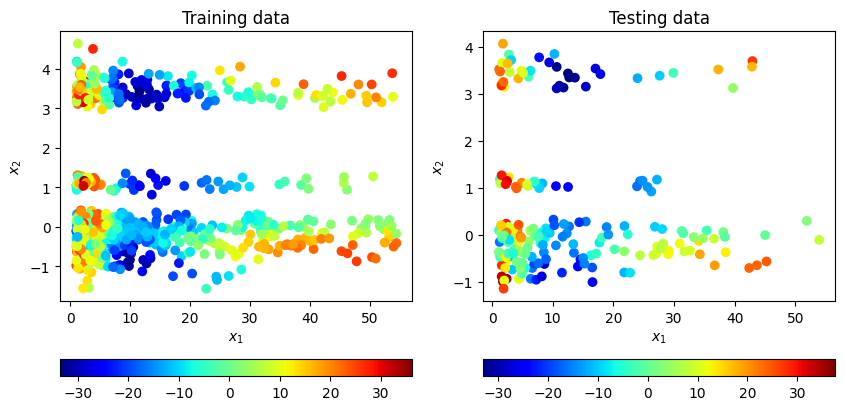

In [3]:
data = np.load("w6-p1-data.npy")
X, y = data[:,:2], data[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=int(0.8*len(y)),random_state=0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot(X_train, y_train, "Training data")
plt.subplot(1,2,2)
plot(X_test, y_test, "Testing data")
plt.show()

## Models (no input scaling)
Fit 4 models to the training data:
- `LinearRegression()`. This should be a pipeline whose first step is `PolynomialFeatures()` with degree 8.
- `SVR()` with C = 1000 and "rbf" kernel
- `KNeighborsRegressor()` using 4 nearest neighbors
- `RandomForestRegressor()` with 100 estimators of max depth 10

Print the Train and Test MSE for each

In [28]:
model_names = ["LSR", "SVR", "KNN", "RF"]

# YOUR CODE GOES HERE
linear_regression = Pipeline([("Polynomial Features", PolynomialFeatures(8)), ("Linear Regression", LinearRegression())])
k_neighbors_regressor = KNeighborsRegressor(n_neighbors=4)
random_forest_regressor = RandomForestRegressor(n_estimators=100, max_depth=10)
model = [linear_regression, svr, k_neighbors_regressor, random_forest_regressor]

for i in range(len(model)):
    model[i].fit(X_train, y_train)
    print(f"Model: {model_names[i]}")
    print(f"Train MSE: {mean_squared_error(y_train, model[i].predict(X_train)):.4f}")
    print(f"Test MSE: {mean_squared_error(y_test, model[i].predict(X_test)):.4f} \n")

Model: LSR
Train MSE: 43.9242
Test MSE: 45.3137 

Model: SVR
Train MSE: 82.0435
Test MSE: 98.6332 

Model: KNN
Train MSE: 26.8565
Test MSE: 47.6362 

Model: RF
Train MSE: 6.0779
Test MSE: 25.8371 



## Visualizing the predictions
Plot the predictions of each method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.

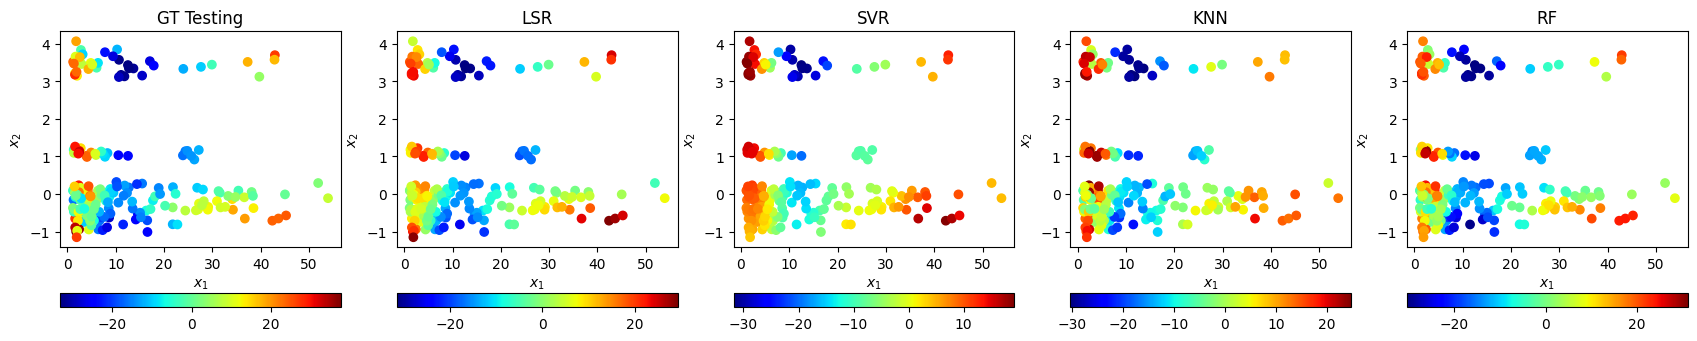

In [24]:
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(X_test, y_test, "GT Testing")
for i in range(len(model)):
    plt.subplot(1,5,i+2)
    plot(X_test, model[i].predict(X_test), model_names[i])
plt.show()

## Quantile Scaling

A `QuantileTransformer()` can transform the input data in a way that attempts to match a given distribution (uniform distribution by default).  
- Create a quantile scaler with `n_quantiles = 800`.
- Then, create a pipeline for each of the 4 types of models used earlier
- Fit each pipeline to the training data, and again print the train and test MSE

In [25]:
pipeline_names = ["LSR, scaled", "SVR, scaled", "KNN, scaled", "RF, scaled"]

# YOUR CODE GOES HERE
quantile_transformer = QuantileTransformer(n_quantiles=800)
for i in range(len(model)):
    scaled_model = Pipeline([("Quantile Transformer", quantile_transformer), (pipeline_names[i], model[i])])
    scaled_model.fit(X_train, y_train)
    print(f"Pipeline: {pipeline_names[i]}")
    print(f"\tTrain MSE: {mean_squared_error(y_train, scaled_model.predict(X_train)):.4f}")
    print(f"\tTest MSE: {mean_squared_error(y_test, scaled_model.predict(X_test)):.4f}\n")

Pipeline: LSR, scaled
	Train MSE: 38.1031
	Test MSE: 43.1900

Pipeline: SVR, scaled
	Train MSE: 41.0343
	Test MSE: 43.0179

Pipeline: KNN, scaled
	Train MSE: 19.6877
	Test MSE: 36.3970

Pipeline: RF, scaled
	Train MSE: 5.9594
	Test MSE: 23.9455



## Visualization with scaled input
As before, plot the predictions of each *scaled* method on the testing data in a 1x5 subplot structure, with the ground truth values as the leftmost subplot.  

This time, for each plot, show the scaled data points instead of the original data. You can do this by calling `.transform()` on your quantile scaler. The scaled points should appear to follow a uniform distribution.

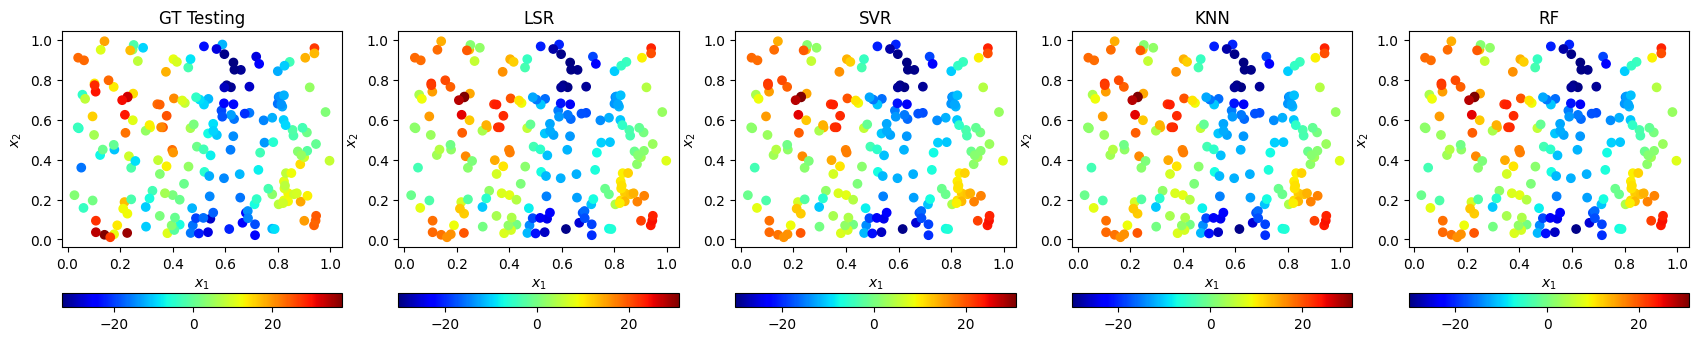

In [27]:
# YOUR CODE GOES HERE
plt.figure(figsize=(21,4))
plt.subplot(1,5,1)
plot(quantile_transformer.transform(X_test), y_test, "GT Testing")
for i in range(len(model)):
    plt.subplot(1,5,i+2)
    plot(quantile_transformer.transform(X_test), scaled_model.predict(X_test), model_names[i])
plt.show()

## Questions

1. Without transforming the input data, which model performed the best on test data? What about after scaling?  

RF performed the best both before and after scaling.

2. For each method, say whether scaling the input improved or worsened, how extreme the change was, and why you think this is.

LSR: Improved a little bit from scaling because uniform disctribution data allows the model to find the patten more fitted.

SVR: Improved a lot because SVR does better with more uniformed distribution data. The scaling reduces the outlier data which have a heavily panalty on the model. With a large C in this case, allows less misclacification in the case, and overall improves the performance of the model.

KNN: Improved a little bit because scaling allows a more spread data points in a more uniform way allowing for better choosing between points closest have the most inluence.

RF: Performed almost the same because RF already have built in function of selecting subset of features and averages a number of different models. 
